# Seek Market Analysis
#### Collaborators:
James Rutherford - s5132147 - james.rutherford@griffithuni.edu.au  
Zakaria Wardere - s5302830 - zakaria.wardere@griffithuni.edu.au

## Part 2: Data Analysis and Interpretation

Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jruth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jruth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jruth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Read in the cleaned data set

In [2]:
df = pd.read_csv('data_cleaned.csv')

C:\Users\jruth\AppData\Local\Temp\ipykernel_22328\2599512217.py:1: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_cleaned.csv')


## Job Meta Data
Analyzing job metadata provides a comprehensive overview of the job market across various dimensions. Each job is categorized into specific sectors and sub-sectors, offering insights into the diverse industries represented in the dataset. The geographic distribution of jobs is another critical aspect, highlighting where job opportunities are concentrated and identifying key employment hubs. Furthermore, examining the salary ranges for each job reveals the financial landscape of different roles, from entry-level to high-paying positions. This analysis helps in understanding which sectors and locations offer competitive salaries and which roles dominate specific regions, thereby providing valuable information for job seekers, employers, and policymakers looking to understand and improve the job market dynamics.

### Classification vs Number of Jobs

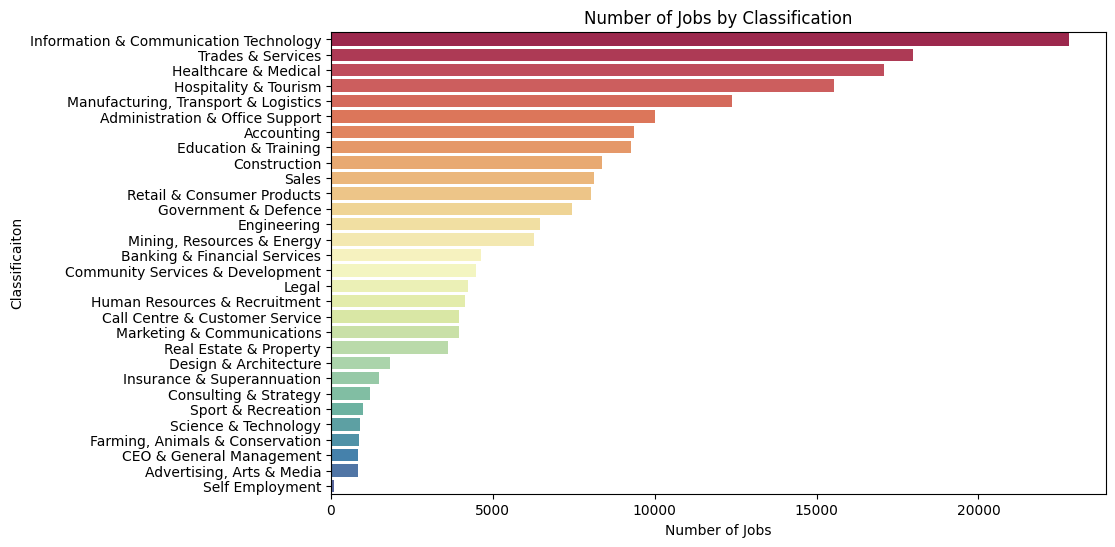

In [3]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Classification'].value_counts(), y=df['Classification'].value_counts().index, hue=df['Classification'].value_counts().index, palette='Spectral')
plt.title('Number of Jobs by Classification')
plt.xlabel('Number of Jobs')
plt.ylabel('Classificaiton')
plt.show()

### Obvserations:
- The Information & Communication Technology (ICT) sector has the highest number of job postings, significantly outpacing other sectors. This indicates a strong demand for technology-related roles in the job market at the moment.
- rades & Services, Healthcare & Medical, and Hospitality & Tourism are among the other top sectors, highlighting a substantial demand for service-oriented professions. These sectors also reflect essential services that are continuously in demand.
- The Manufacturing, Transport & Logistics sector also shows a considerable number of job postings, suggesting the importance of these roles in supporting the supply chain and production industries.
- Administration & Office Support and Accounting are well-represented, emphasizing the need for organizational and financial management skills across various industries.
- The distribution of job postings across a wide range of classifications indicates a diverse job market, catering to various skills and professions.
- Certain specialized sectors such as Science & Technology, Advertising, Arts & Media, and Self Employment have fewer job postings, which might reflect niche markets or highly specialized skills requirements.

### Location vs Number of Jobs

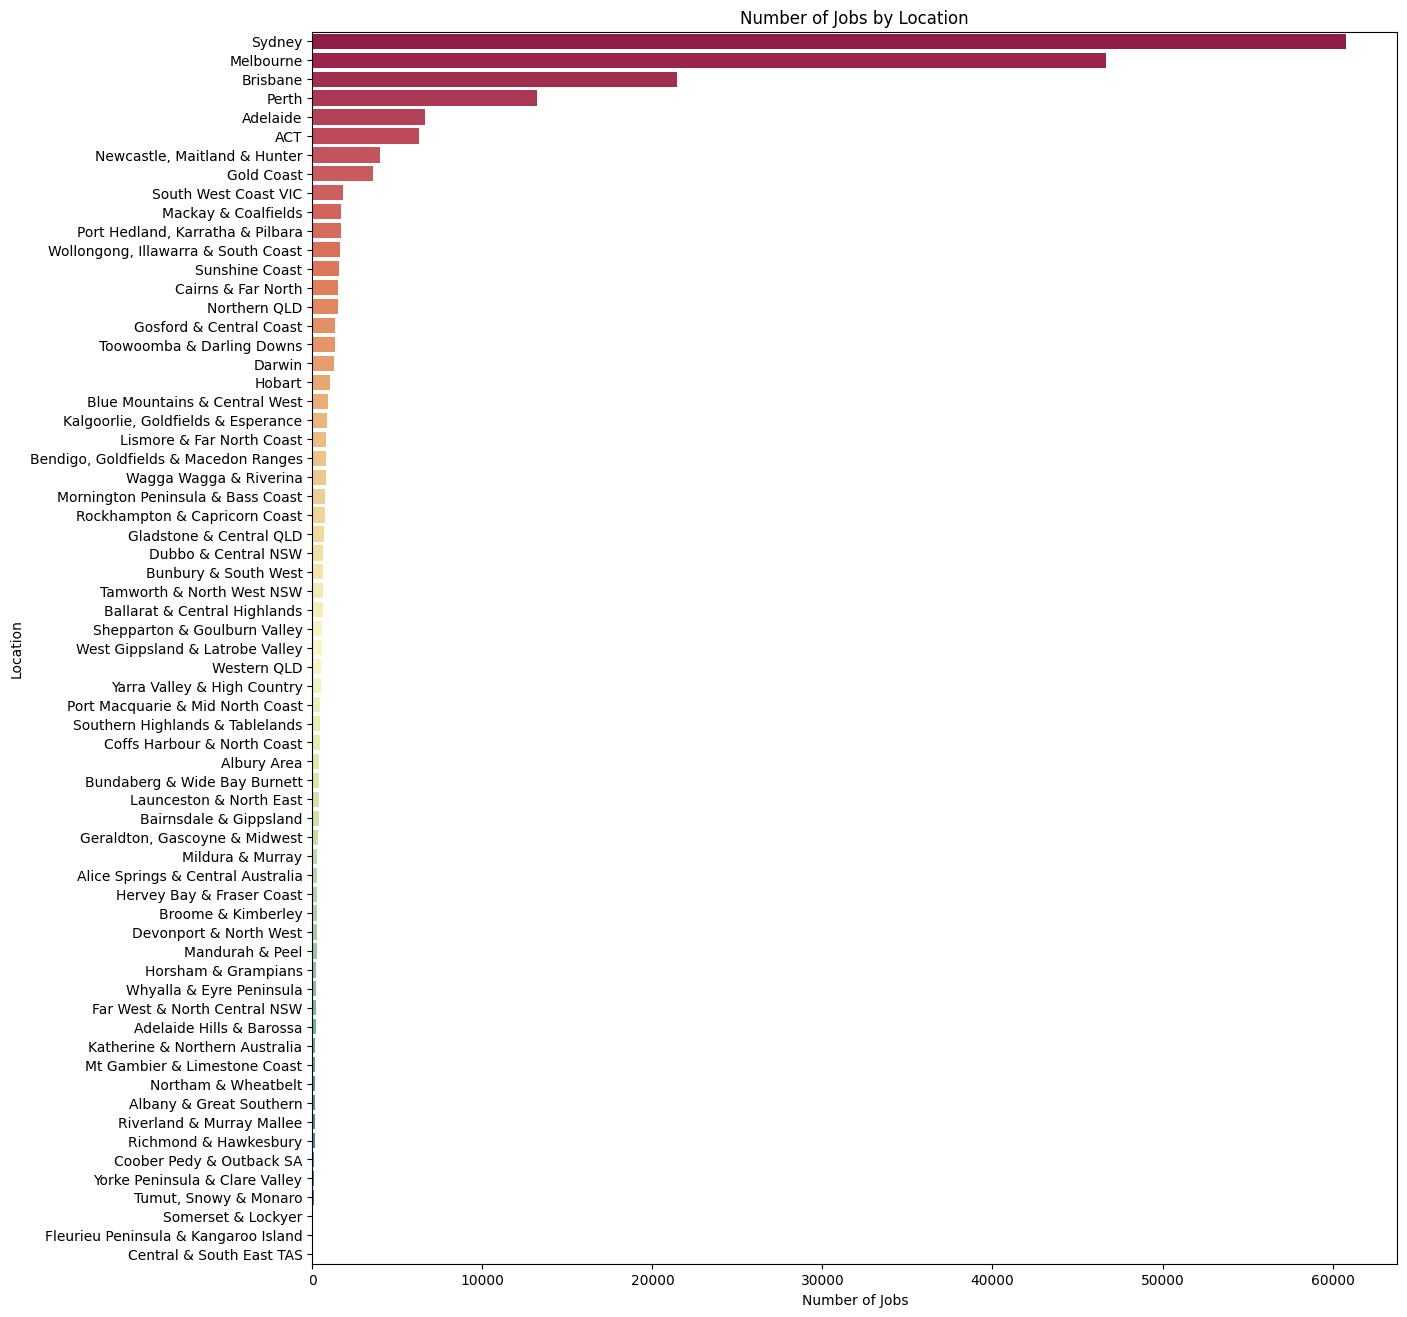

In [4]:
plt.figure(figsize=(14, 16))
sns.barplot(x=df['Location'].value_counts(), y=df['Location'].value_counts().index, hue=df['Location'].value_counts().index, palette='Spectral')
plt.title('Number of Jobs by Location')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()

### Observations:
- Sydney and Melbourne especially but also Brisbane and Perth dominate the job market, with the highest number of job postings. This indicates that these cities are the primary hubs for employment opportunities in Australia.
- Locations like Adelaide, Newcastle, Maitland & Hunter, and Gold Coast have moderate job postings, suggesting these areas have vibrant, albeit smaller, job markets compared to the major cities.
- Many regional areas and smaller towns show significantly fewer job postings. This highlights the disparity in job opportunities between urban and rural areas, potentially indicating a need for regional economic development.

### Salary Ranges & Job Types

In [5]:
# Melt the DataFrame to have a single salary column for plotting
melted_df = df.melt(id_vars=['Classification'], value_vars=['HighestSalary', 'LowestSalary'], var_name='SalaryType', value_name='Salary')

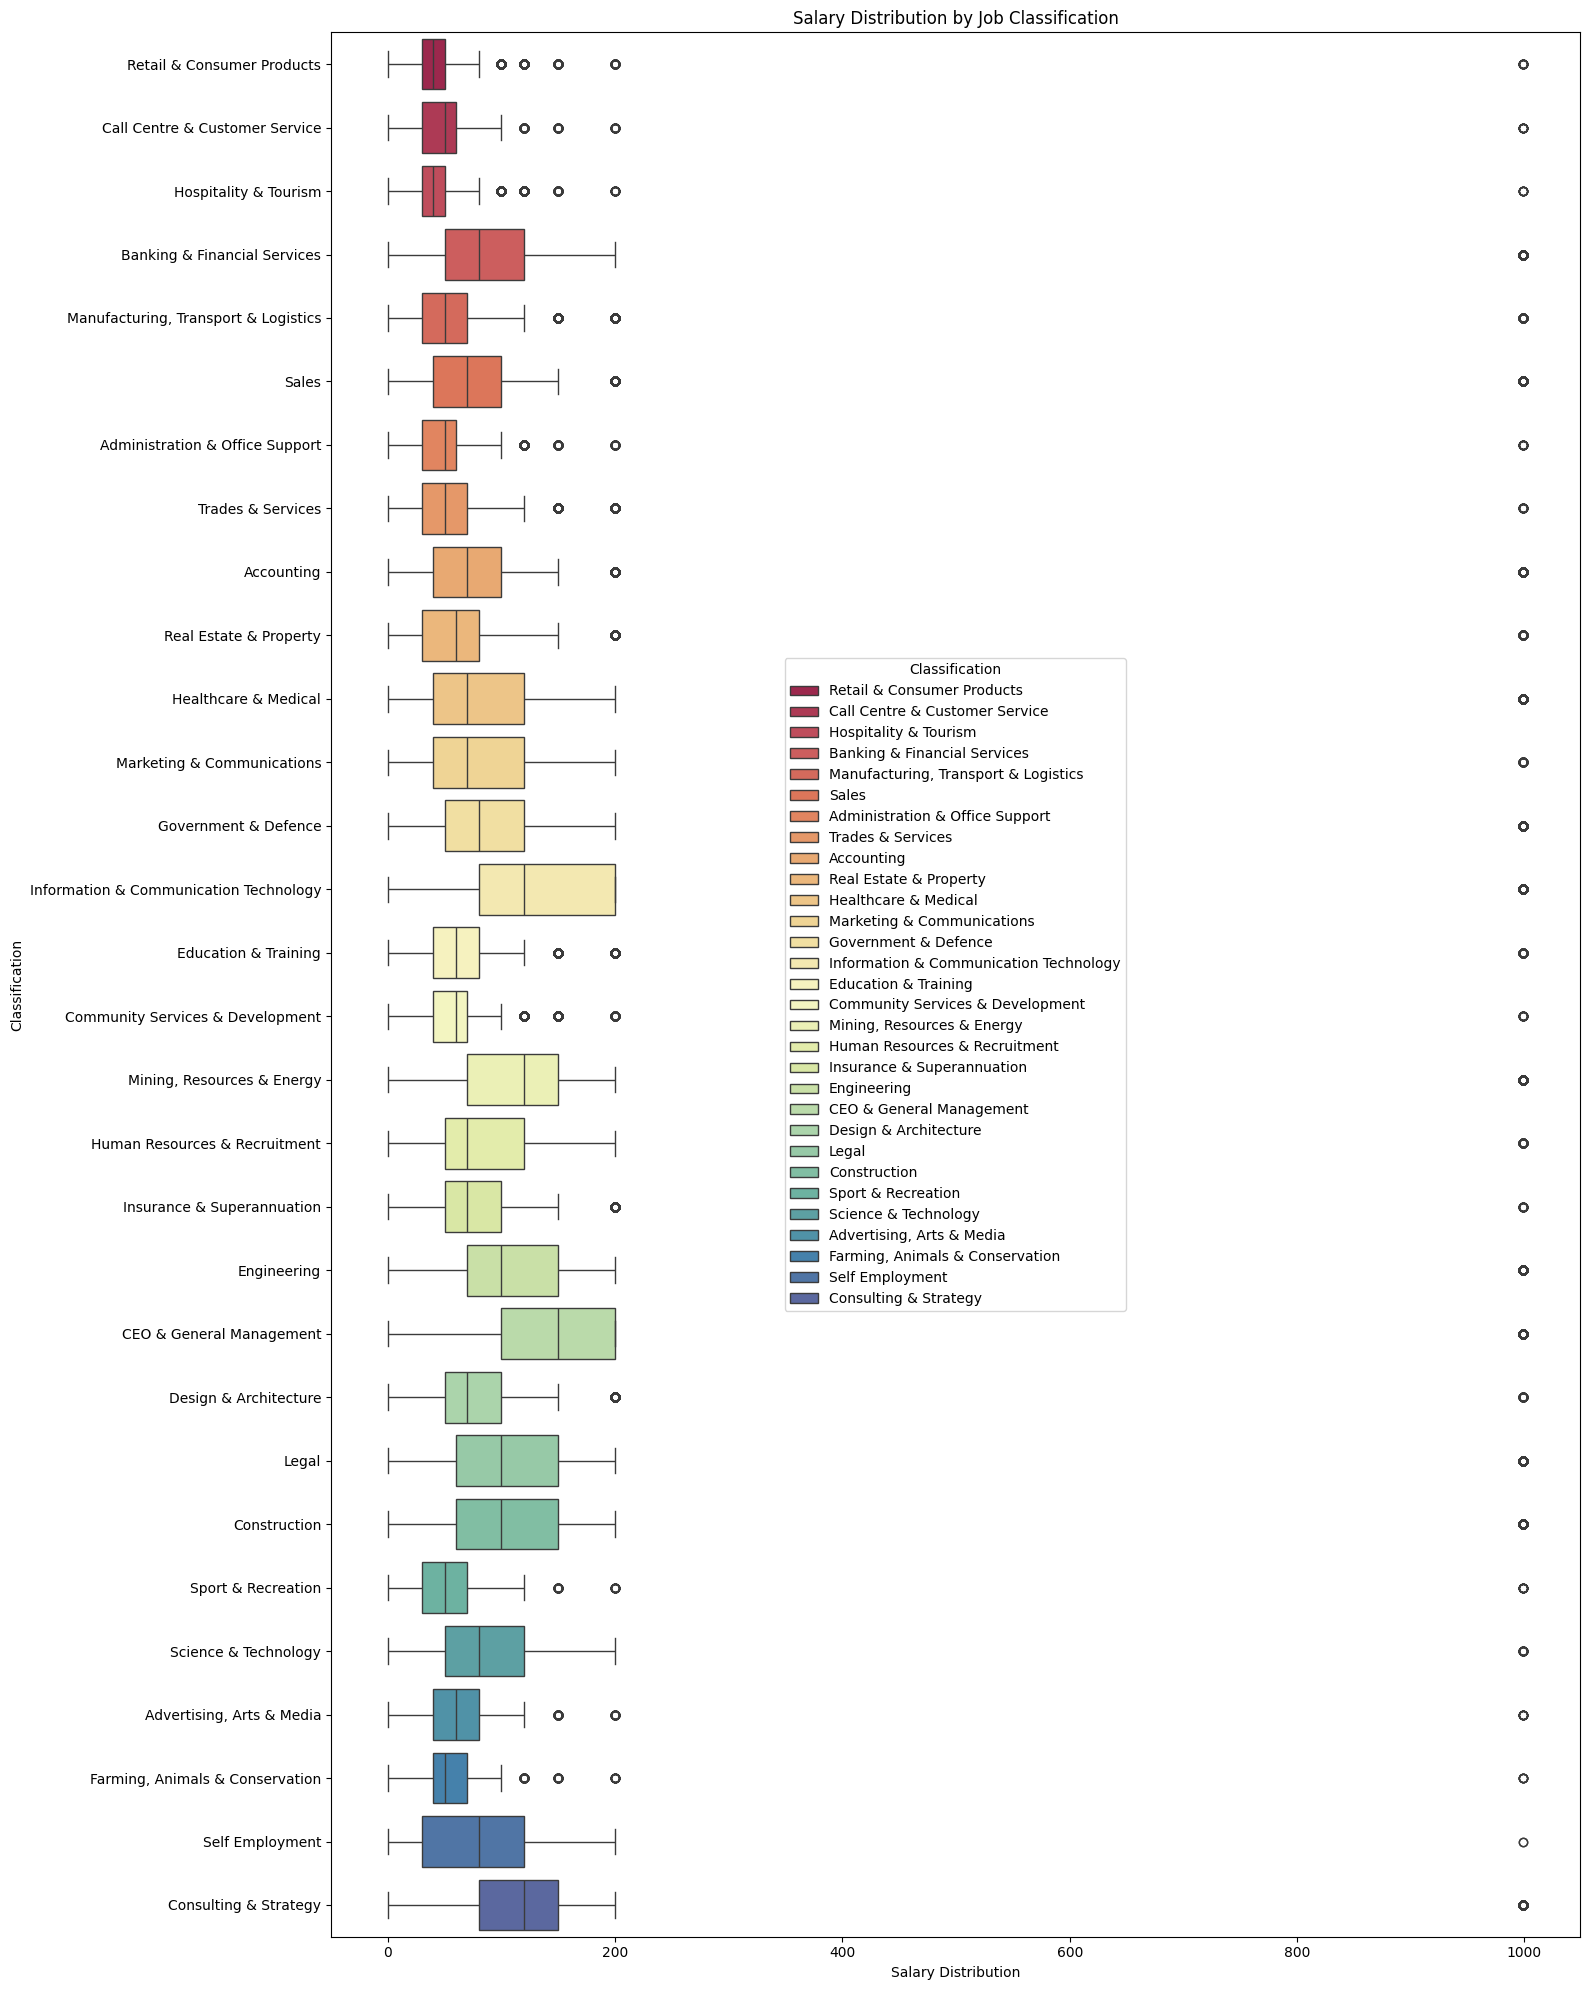

In [6]:
plt.figure(figsize=(16, 20))
sns.boxplot(x='Salary', y='Classification', data=melted_df, hue='Classification', palette='Spectral')
plt.title('Salary Distribution by Job Classification')
plt.xlabel('Salary Distribution')
plt.ylabel('Classification')
plt.tight_layout()
plt.show()

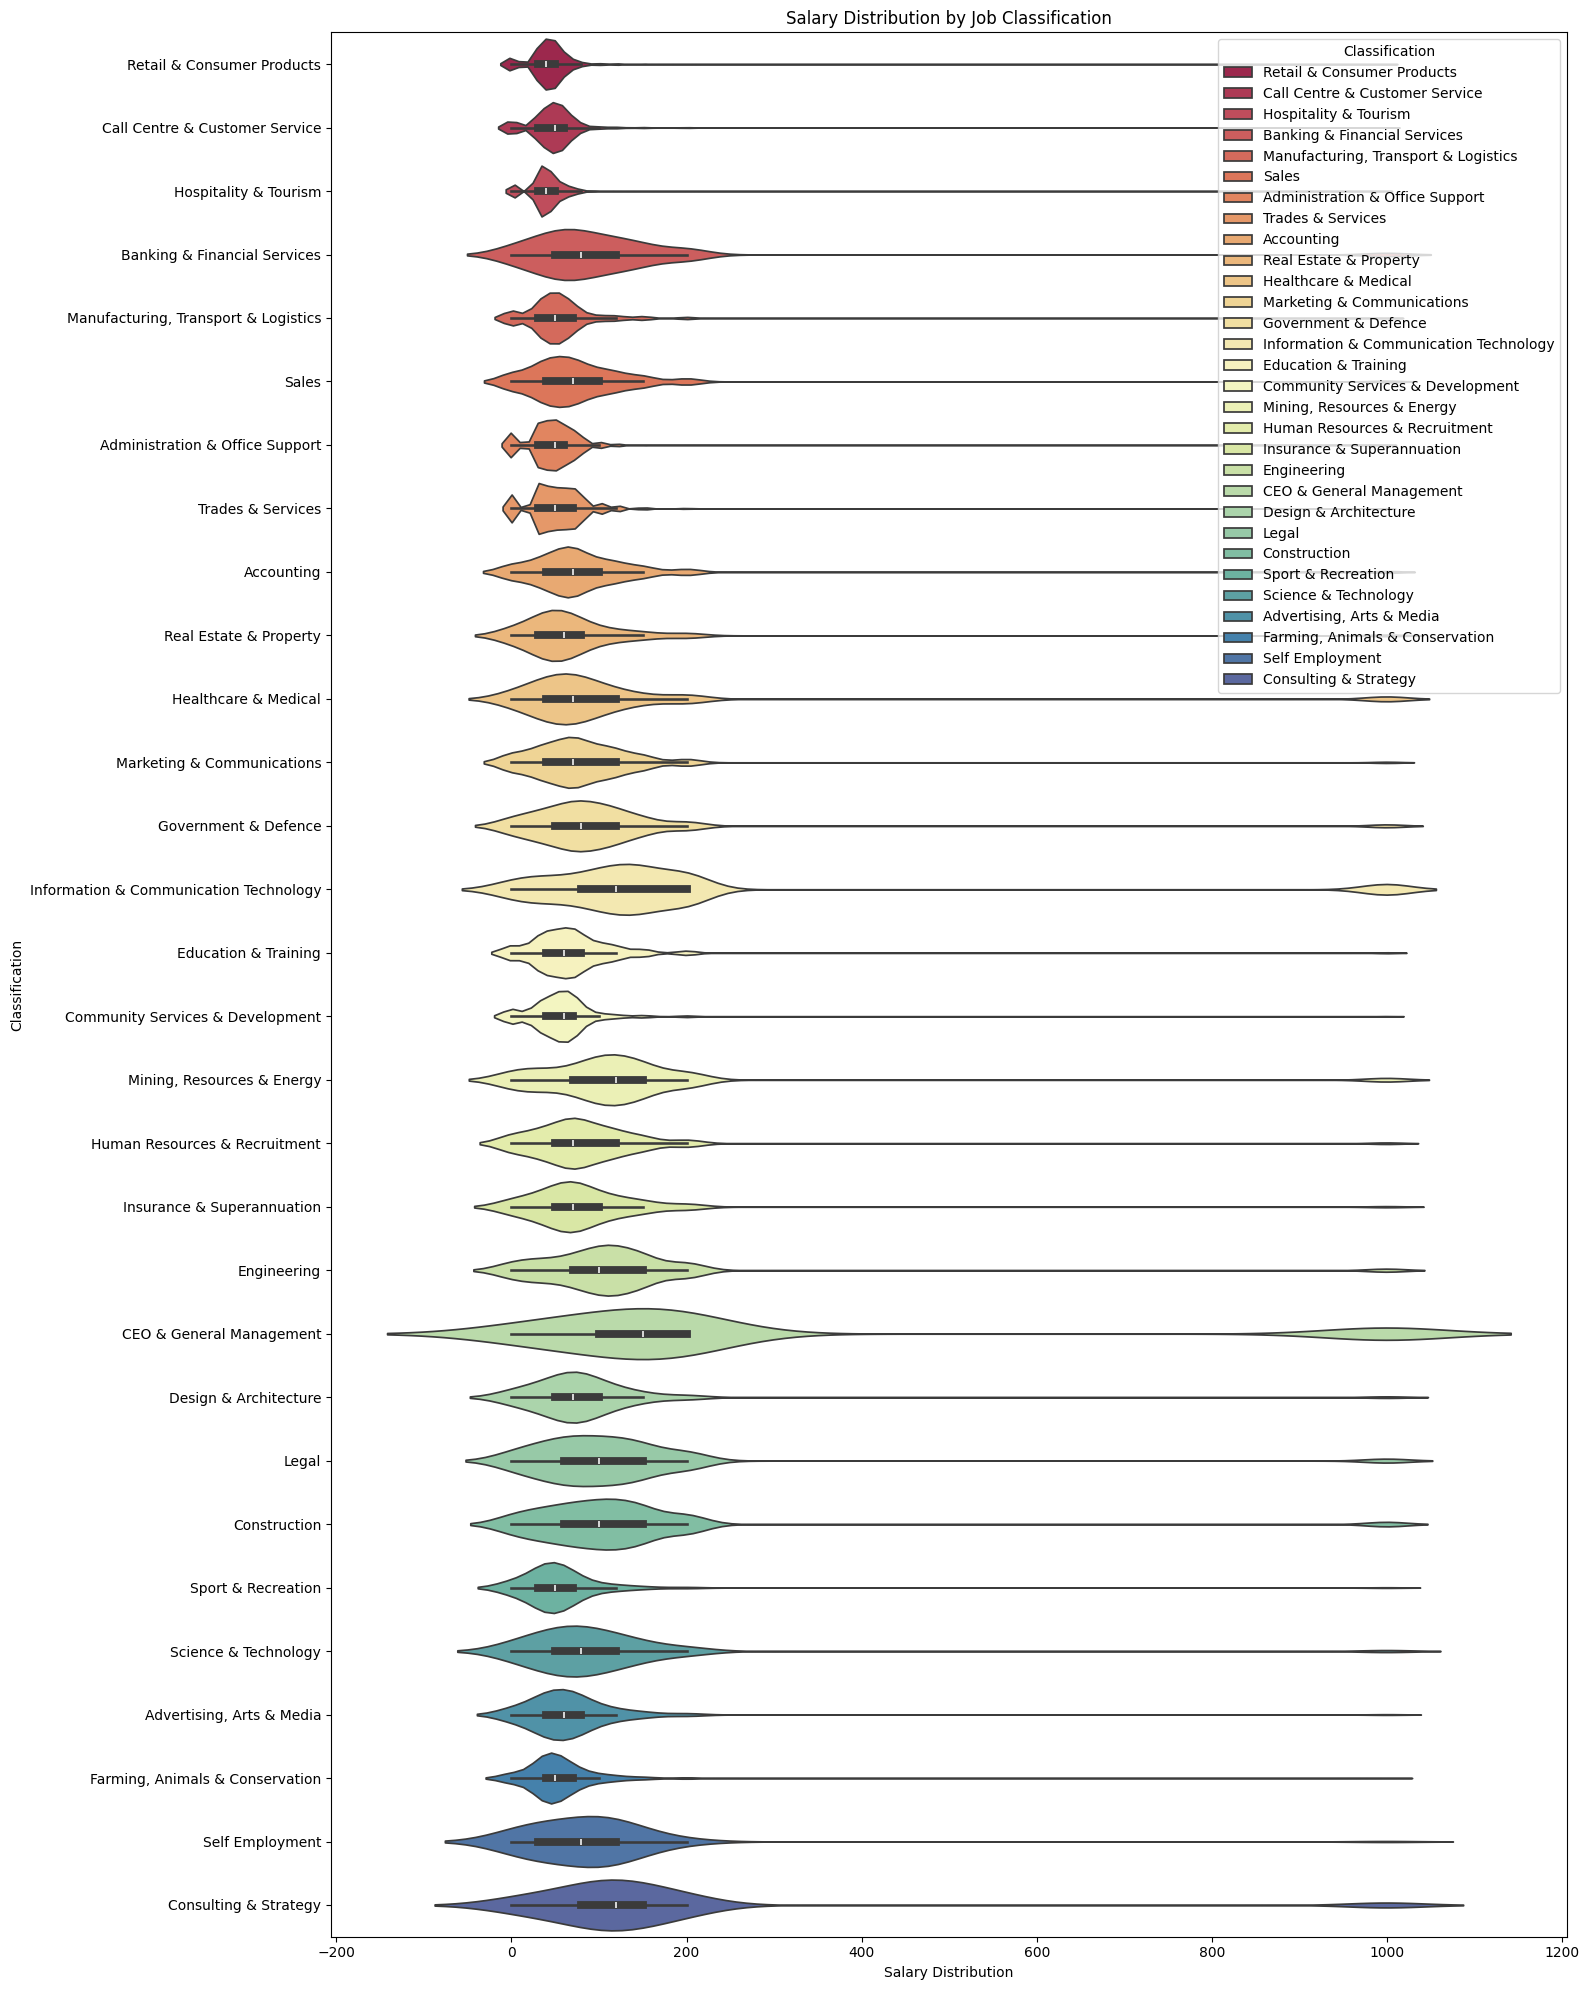

In [7]:
plt.figure(figsize=(16, 20))
sns.violinplot(x='Salary', y='Classification', data=melted_df, hue='Classification', palette='Spectral')
plt.title('Salary Distribution by Job Classification')
plt.xlabel('Salary Distribution')
plt.ylabel('Classification')
plt.tight_layout()
plt.show()

### Observations:
- The Consulting & Strategy classification shows the widest salary range, indicating significant variability in compensation, possibly reflecting roles from entry-level consultants to senior strategists.
- CEO & General Management positions have some of the highest median salaries, highlighting the lucrative nature of executive roles.
- Retail & Consumer Products exhibit a narrower salary range, suggesting more uniform compensation across roles in this classification.
- Many classifications, such as Information & Communication Technology, Healthcare & Medical, and Engineering, show diverse salary distributions with both low and high-paying roles, reflecting the wide array of job positions within these sectors.
- Service-oriented classifications like Call Centre & Customer Service and Hospitality & Tourism have relatively consistent salary patterns.

## Job Market by Location
Investigating the job market by location provides critical insights into regional employment dynamics, helping to identify where job opportunities are concentrated and which sectors are thriving in each city. By analyzing the market size in major cities like Sydney, Melbourne, Brisbane, and Perth, we can understand the urban centers that drive employment and economic growth. Identifying the hottest job sectors in each city helps job seekers align their skills with demand and allows policymakers to tailor economic strategies to regional strengths. Examining the common salary ranges reveals the economic health and cost of living in different areas, and helping to guide employers in setting competitive salaries. Additionally, detecting patterns in job postings, such as the tendency for more jobs to be listed at the beginning of the month, provides insights into recruitment cycles and helps both employers and job seekers optimize their search strategies.

### Market size in each city

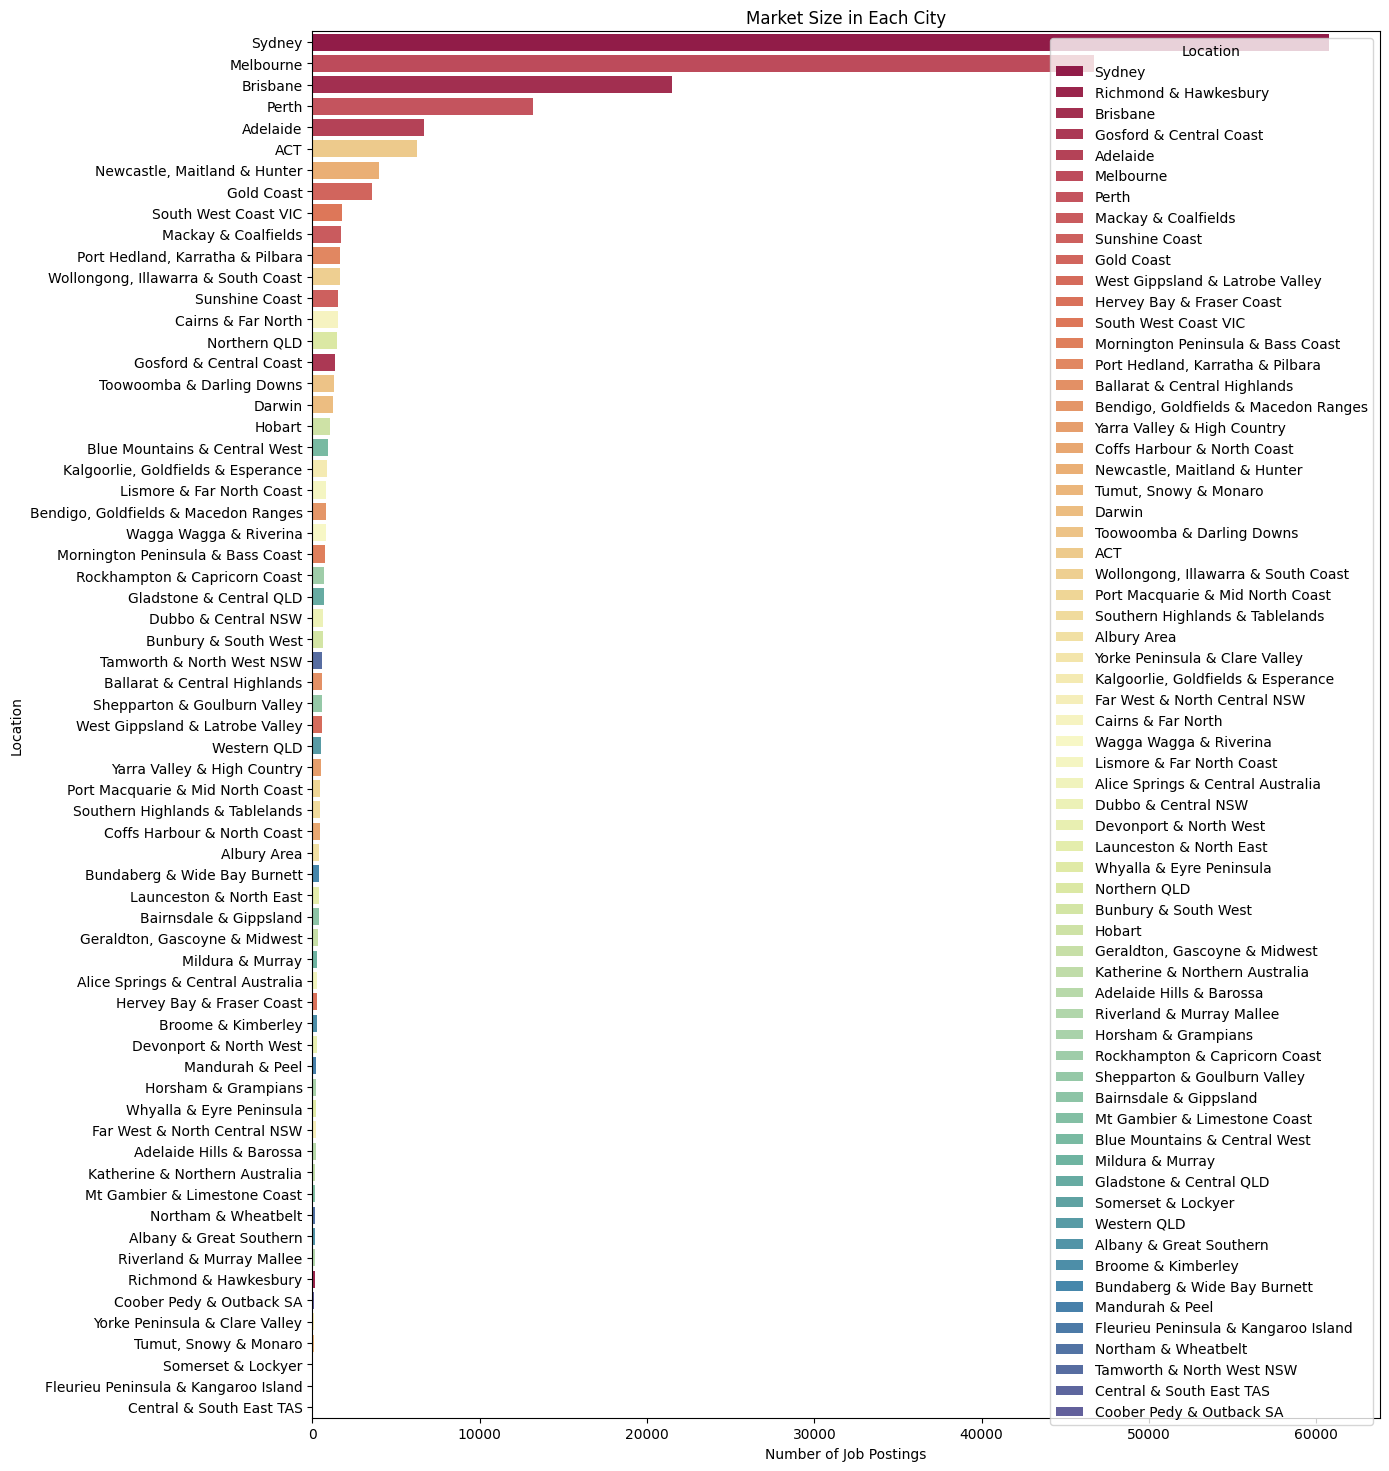

In [8]:
# Market size in each city
plt.figure(figsize=(14, 16))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index, hue='Location', palette='Spectral')
plt.title('Market Size in Each City')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

### Hottest Job Sectors in Each City

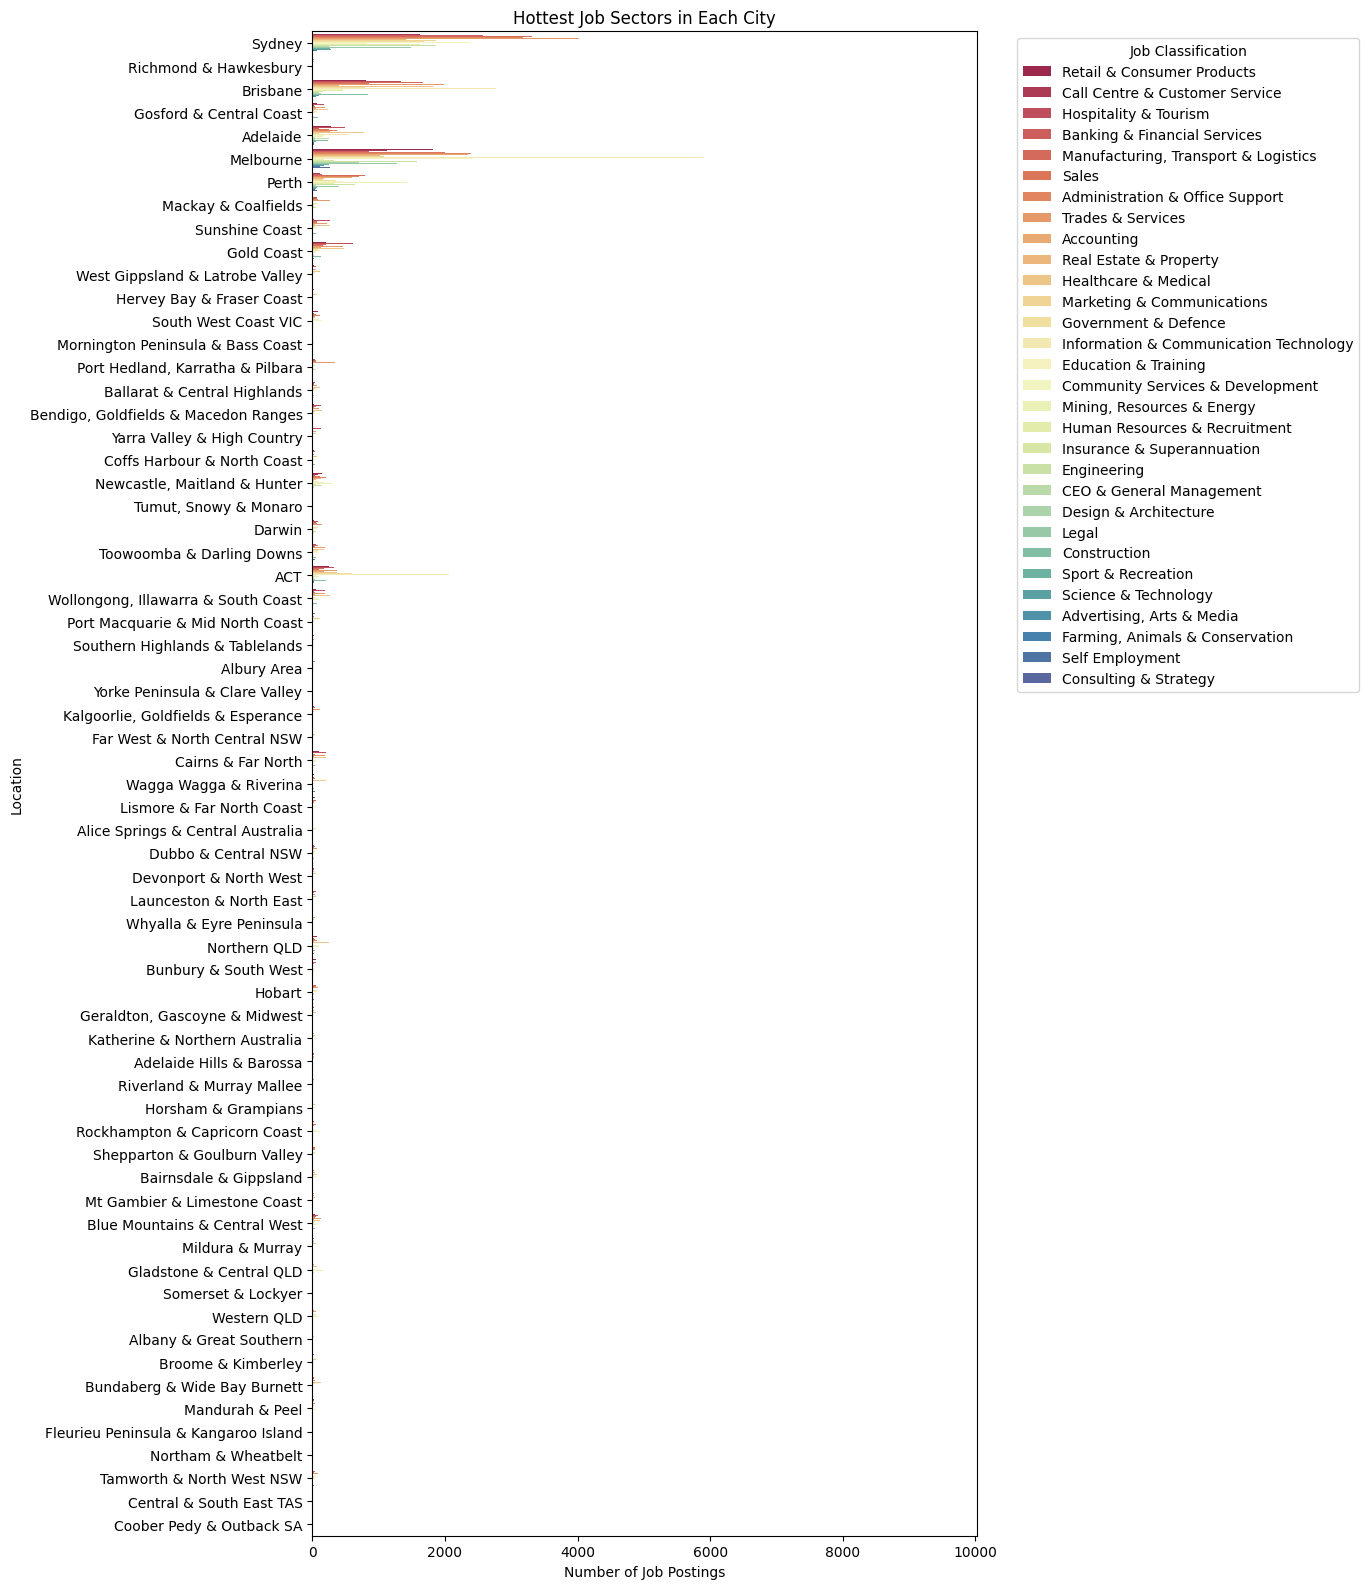

In [9]:
# Hottest job sectors in each city
plt.figure(figsize=(14, 16))
sns.countplot(y='Location', hue='Classification', data=df, palette='Spectral')
plt.title('Hottest Job Sectors in Each City')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.legend(title='Job Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Obersvations:
- Sydney, Melbourne, Brisbane, and Perth showcase a diverse range of job sectors, indicating robust and multifaceted job markets.
- Both Sydney and Melbourne have substantial job postings in sectors like Information & Communication Technology, Healthcare & Medical, and Trades & Services, reflecting their roles as leading economic centers.
- Melbourne shows a noticeable spike in the Healthcare & Medical sector, while ACT (Australian Capital Territory) has a significant number of postings in Government & Defence, highlighting the locations's public sector employment focus.
- Regional areas and smaller towns show more specialized job markets, often dominated by sectors like Mining, Resources & Energy, and Agriculture, reflecting the local economic activities.

### Salary Ranges in the Major Hubs

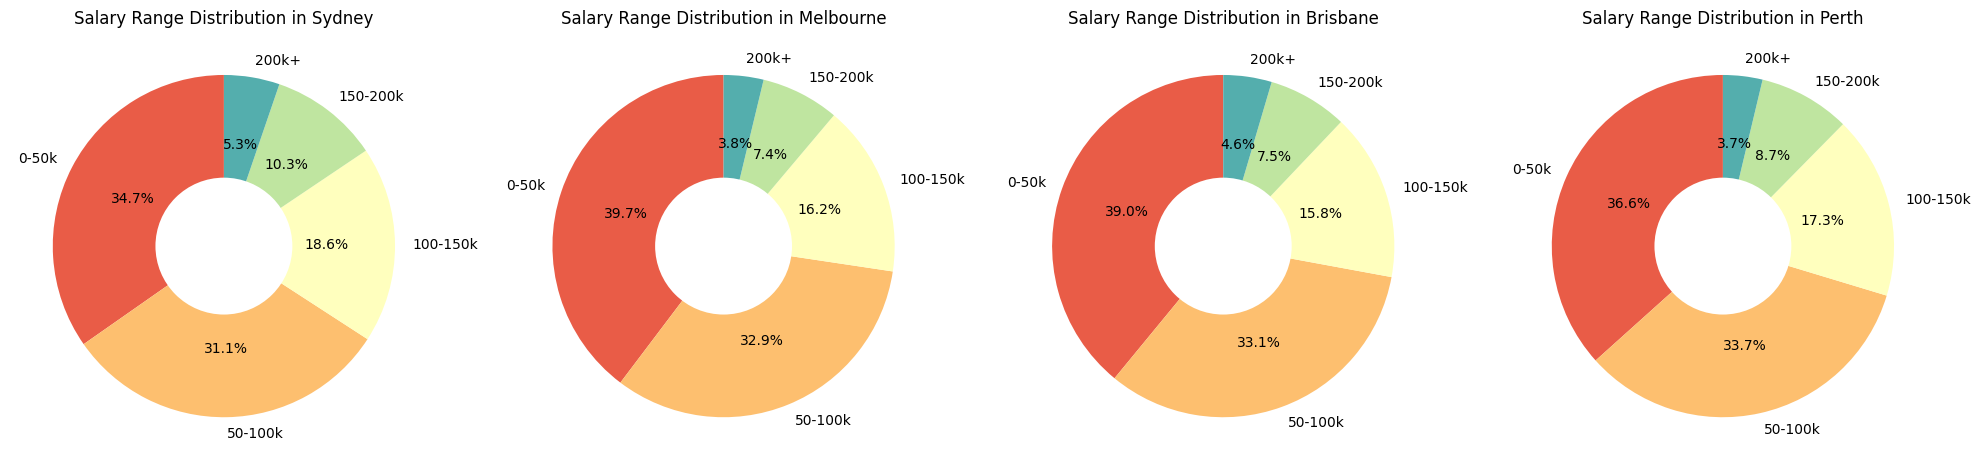

In [10]:
salary_bins = [0, 50, 100, 150, 200, np.inf]
salary_labels = ['0-50k', '50-100k', '100-150k', '150-200k', '200k+']

df['AverageSalary'] = (df['HighestSalary'] + df['LowestSalary']) / 2
df['SalaryRange'] = pd.cut(df['AverageSalary'], bins=salary_bins, labels=salary_labels)

# Filter for specific cities
cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth']
df_filtered = df[df['Location'].isin(cities)]
salary_distribution = df_filtered.groupby(['Location', 'SalaryRange'], observed=False).size().unstack()
num_cities = len(cities)

fig, axes = plt.subplots(nrows=1, ncols=num_cities, figsize=(20, 10))
for i, city in enumerate(cities):
    ax = axes[i] if num_cities > 1 else axes
    wedges, texts, autotexts = ax.pie(
        salary_distribution.loc[city],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('Spectral', len(salary_labels)),
        wedgeprops=dict(width=0.8),
        labels=salary_labels
    )
    ax.set_ylabel('')
    ax.set_title(f'Salary Range Distribution in {city}')
    centre_circle = plt.Circle((0, 0), 0.4, fc='white')
    ax.add_artist(centre_circle)
    
plt.tight_layout()
plt.show()

### Observations:
- Across all four cities the majority of job postings fall within the 0-50k and 50-100k salary ranges, highlighting a concentration of lower to mid-range salaries.
- Brisbane shows a higher proportion of job postings in the 200k+ salary range (4.6%) compared to Melbourne (3.8%), which is notable given Melbourne's status as a larger job market. This suggests that Brisbane has more high-paying roles relative to its size.
- The 100-150k salary range remains relatively consistent across all cities, indicating a stable demand for mid-level professional roles.
- Brisbane and Melbourne have a larger share of job postings in the 0-50k range, with Brisbane at 39.0% and Melbourne at 39.7%, reflecting a significant number of entry-level or lower-paying jobs.

### Time Series Analysis

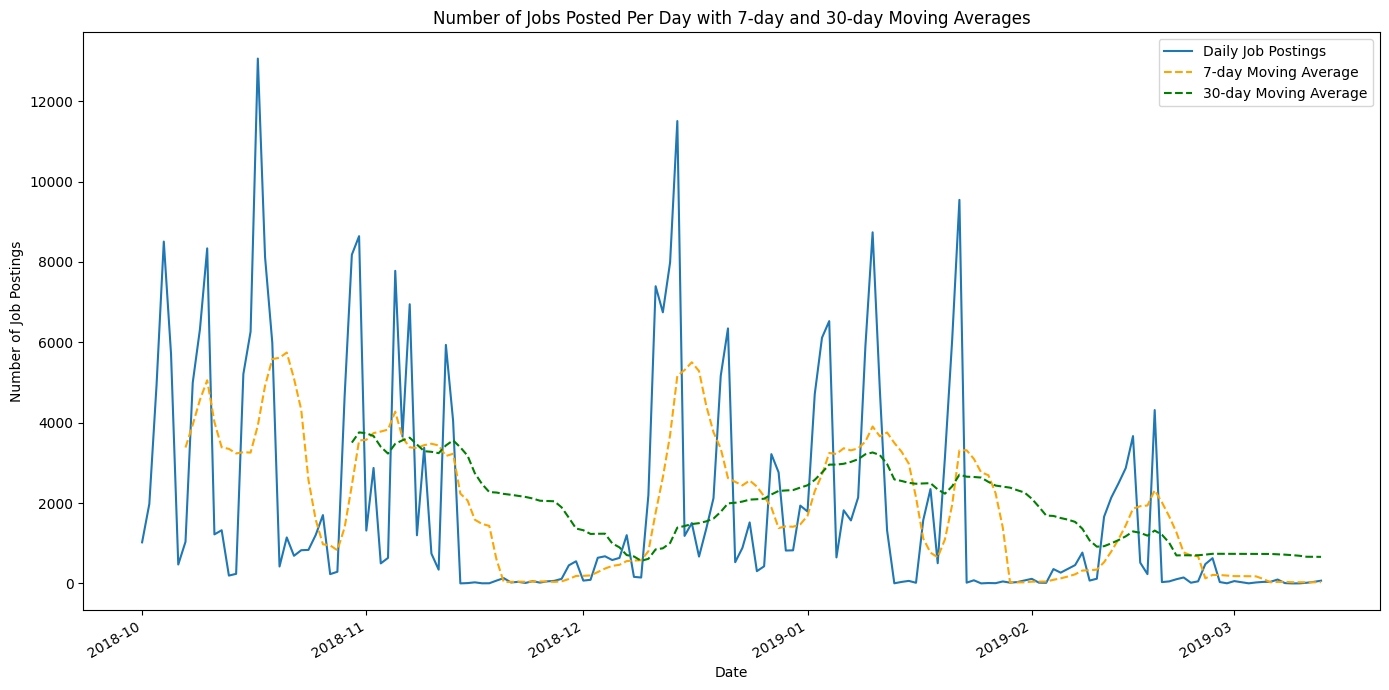

In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
daily_postings = df.groupby('Date').size().reset_index(name='Job Postings')

daily_postings['7-day Moving Average'] = daily_postings['Job Postings'].rolling(window=7).mean()
daily_postings['30-day Moving Average'] = daily_postings['Job Postings'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_postings, x='Date', y='Job Postings', label='Daily Job Postings')
sns.lineplot(data=daily_postings, x='Date', y='7-day Moving Average', label='7-day Moving Average', color='orange', linestyle='--')
sns.lineplot(data=daily_postings, x='Date', y='30-day Moving Average', label='30-day Moving Average', color='green', linestyle='--')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() 

plt.title('Number of Jobs Posted Per Day with 7-day and 30-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.tight_layout()
plt.show()

### Observations:
- The number of job postings per day exhibits high variability, with several prominent peaks and troughs, uggesting that job posting activity fluctuates significantly on a day-to-day basis.
- There are notable peaks in job postings around mid-October, late November, and mid-January. These spikes might correspond to specific recruitment drives or seasonal hiring trends such as new rounds of graduate roles that come available as the end of the university year finishes.
- The dataset had a significant amount of data removed, which may have impacted the overall trend and pattern visibility. It's important to consider that the observed patterns might be influenced by this data removal.
- The 7-day and 30-day moving averages provide a smoother view of the job posting trends.Both averages indicate a general decline in job postings towards the end of the data collection period but there isnt anything overly meaningful to take from this.
- The timeframe of the data collected is relatively short, spanning from October 2018 to March 2019. This limited period may not capture all seasonal trends and long-term patterns in job postings.

## Job Market by Sectors
Analyzing the job market by sectors is crucial for understanding the economic landscape and guiding both job seekers and policymakers. Identifying which sectors hold the highest market share helps highlight the dominant industries driving employment. Within each sector, spotlighting the main sub-sectors reveals more granular trends and specific areas of growth or decline. Comparing salary ranges across sectors and sub-sectors provides insights into the financial opportunities available, helping individuals and organizations make informed decisions about career paths and resource allocation. Understanding market trends is vital for advising students on which subjects to study to ensure future employability, aligning educational pathways with market demands. 

In [12]:
classification_counts = df.groupby(['Date', 'Classification']).size().reset_index(name='Job Count')
classification_pivot = classification_counts.pivot(index='Date', columns='Classification', values='Job Count')

start_date = df['Date'].min()
end_date = df['Date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='W')
date_range_df = pd.DataFrame(date_range, columns=['Date'])

classification_pivot = date_range_df.merge(classification_pivot, on='Date', how='left').fillna(0)
classification_pivot = classification_pivot.reset_index(drop=True)

classification_pivot['Total'] = classification_pivot.iloc[:, 1:].sum(axis=1)
for column in classification_pivot.columns[1:-1]:  # Exclude 'Date' and 'Total'
    classification_pivot[column + '_pct'] = (classification_pivot[column] / classification_pivot['Total']) * 100

classification_pct = classification_pivot.melt(id_vars=['Date', 'Total'], var_name='Classification', value_name='Percentage')
classification_pct = classification_pct[classification_pct['Classification'].str.endswith('_pct')]
classification_pct['Classification'] = classification_pct['Classification'].str.replace('_pct', '')

fig = px.line(classification_pct, x='Date', y='Percentage', color='Classification', title='Percentage of Job Market Share by Classification (Weekly)', markers=True)
fig.show()

C:\Users\jruth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


### Observations:
- There are noticeable fluctuations in the market share of certain classifications.
- The chart highlights the dynamic nature of job postings, with certain sectors experiencing spikes in job market share at different times.
- Some classifications like Information & Communication Technology and Trades & Services show significant peaks, reflecting periods of increased job activity.
- Once again, it is effectively meaningless considering temporal data on a scale this small as seasonality and other trends in the dataset that emerge over time can not be meaningfully captured when the period of change is so long.

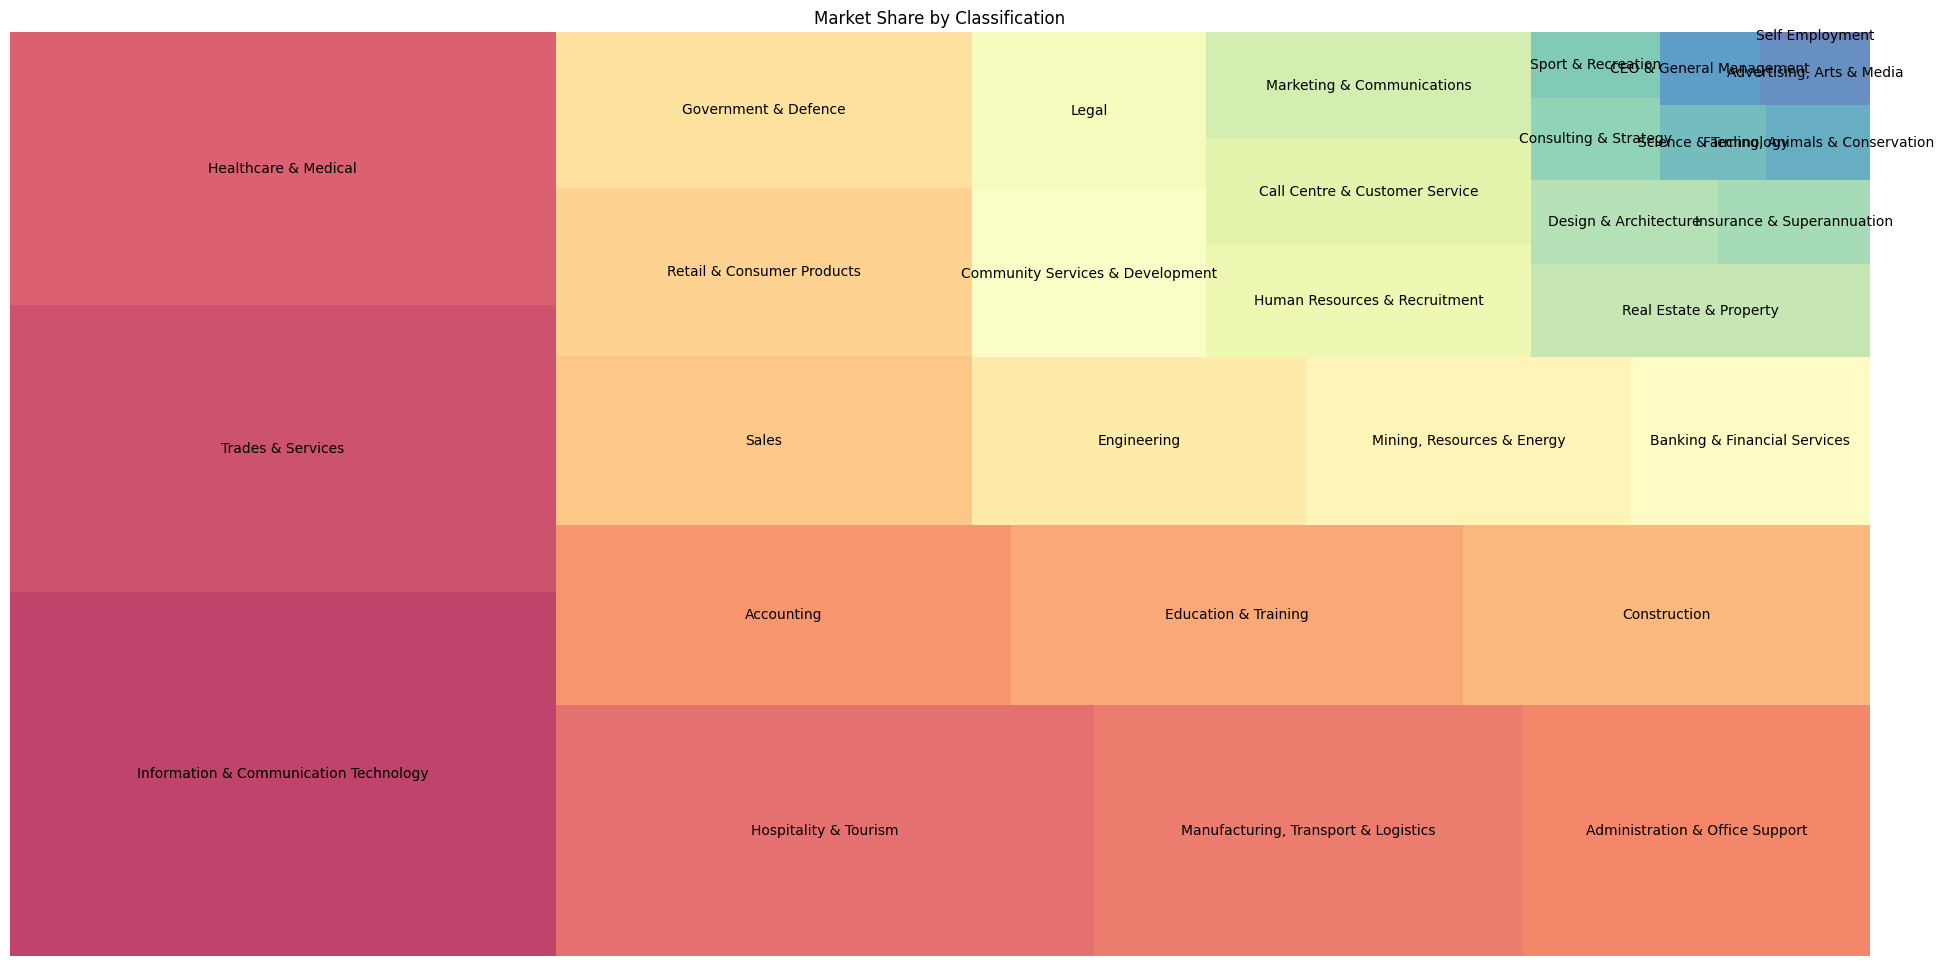

In [13]:
classification_counts = df['Classification'].value_counts().reset_index()
classification_counts.columns = ['Classification', 'Job Postings']

plt.figure(figsize=(24, 12))
squarify.plot(sizes=classification_counts['Job Postings'], label=classification_counts['Classification'], alpha=.8, color=sns.color_palette('Spectral', len(classification_counts)))
plt.title('Market Share by Classification')
plt.axis('off')
plt.show()


### Observations:
- Information & Communication Technology, Trades & Services, and Healthcare & Medical have the largest market shares.
- Presenting the data in a treemap shows the relative size of each classification, highlighting dominant and smaller sectors in the job market. 
- It also allows for quick identification of the most prominent job sectors, providing a clear overview of where the majority of job postings are concentrated.

### SubClassifications in each Classification

In [14]:
subclassification_counts = df.groupby(['Classification', 'SubClassification']).size().reset_index(name='Job Postings')

fig = px.treemap(subclassification_counts, path=['Classification', 'SubClassification'], values='Job Postings', color='Job Postings', color_continuous_scale='Spectral')
fig.update_layout(title='Main SubClassifications within Each Classification')
fig.show()

### Observations:
- Within Information & Communication Technology, "Developers/Programmers" is the largest sub-classification. 
- Similarly, "Nursing - General Medical" dominates Healthcare & Medical.
- "Automotive Trades" is significant within Trades & Services.

### Salaray Range for each Classification / SubClassification

In [15]:
average_salaries = df.groupby('SubClassification')['AverageSalary'].mean().sort_values()

fig = go.Figure(data=go.Heatmap(
    z=[average_salaries.values],
    x=average_salaries.index,
    y=['Average Salary'],
    colorscale='Viridis'))

fig.update_layout(title='Average Salary by SubClassification', xaxis_title='SubClassification', yaxis_title='Average Salary')
fig.show()

### Observations:
- Average salaries across the different subclassifications skews a lot lower towards the lower end salary range. This was also observed on the average salary by city figures above.
- Worth noting that the average salary was calculated by higher + lower and dividing by 2. It provides an indication of what each subclassification gets paid but it may be very misleading for the larger salary ranges such as 200k - 999k.

### Market Trends

In [16]:
market_trends = df.groupby(['Date', 'Classification']).size().reset_index(name='Job Postings')

heatmap_data = market_trends.pivot(index='Classification', columns='Date', values='Job Postings').fillna(0)
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Spectral'))

fig.update_layout(title='Market Trends by Classification (Heatmap)', xaxis_title='Date', yaxis_title='Classification')
fig.show()

### Observations:
- There is an interesting spike on 17/10/2018 in Sport & Recreation, Information & Communication Technology and Healthcare and Medical for the the number of job postings.
- Presenting the data in this format makes it difficult as the period of time is too short to draw any meaningful conclusions that are not exclusively.

### Classification Skill Requirements
The skill requirements for each classification will be mined from the Full Description column. This could be useful in analysis by identifying key skills that relate to each requirement and going one step further, identifying what skills are necessary for a cadidate to have in a specific job.

In [17]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):
        text = ""
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = word_tokenize(text)
    processed_tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens if token.isalpha() and token not in stop_words]
    return processed_tokens

df['ProcessedDescription'] = df['FullDescription'].apply(preprocess_text)

In [18]:
# Remove additional stop words that appeared in the most frequent list but were meaningless
additional_stop_words = set(['li', 'p', 'strong', 'nbsp', 'br', 'ul', 'div'])
df['ProcessedDescription'] = df['ProcessedDescription'].apply(lambda tokens: [token for token in tokens if token not in additional_stop_words])

word_counts = df.explode('ProcessedDescription')['ProcessedDescription'].value_counts().reset_index()
word_counts.columns = ['Word', 'Count']

word_counts_by_classification = df.explode('ProcessedDescription').groupby('Classification')['ProcessedDescription'].apply(lambda x: Counter(x).most_common()).reset_index()
word_counts_by_classification.columns = ['Classification', 'WordCounts']

word_counts_by_classification_df = pd.DataFrame([
    {'Classification': classification, 'Word': word, 'Count': count}
    for classification, word_counts in zip(word_counts_by_classification['Classification'], word_counts_by_classification['WordCounts'])
    for word, count in word_counts
])

        Word   Count
0       work  897495
1     experi  680162
2      manag  644275
3       team  586761
4       role  579573
5     servic  460396
6      skill  449306
7    develop  387549
8   opportun  370035
9       busi  366102
10    provid  361860
11   contact  345784
12   support  336758
13     appli  330382
14        em  321142
15    requir  318234
16    commun  315790
17    applic  311371
18    includ  310088
19     posit  304259


C:\Users\jruth\AppData\Local\Temp\ipykernel_22328\356739560.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




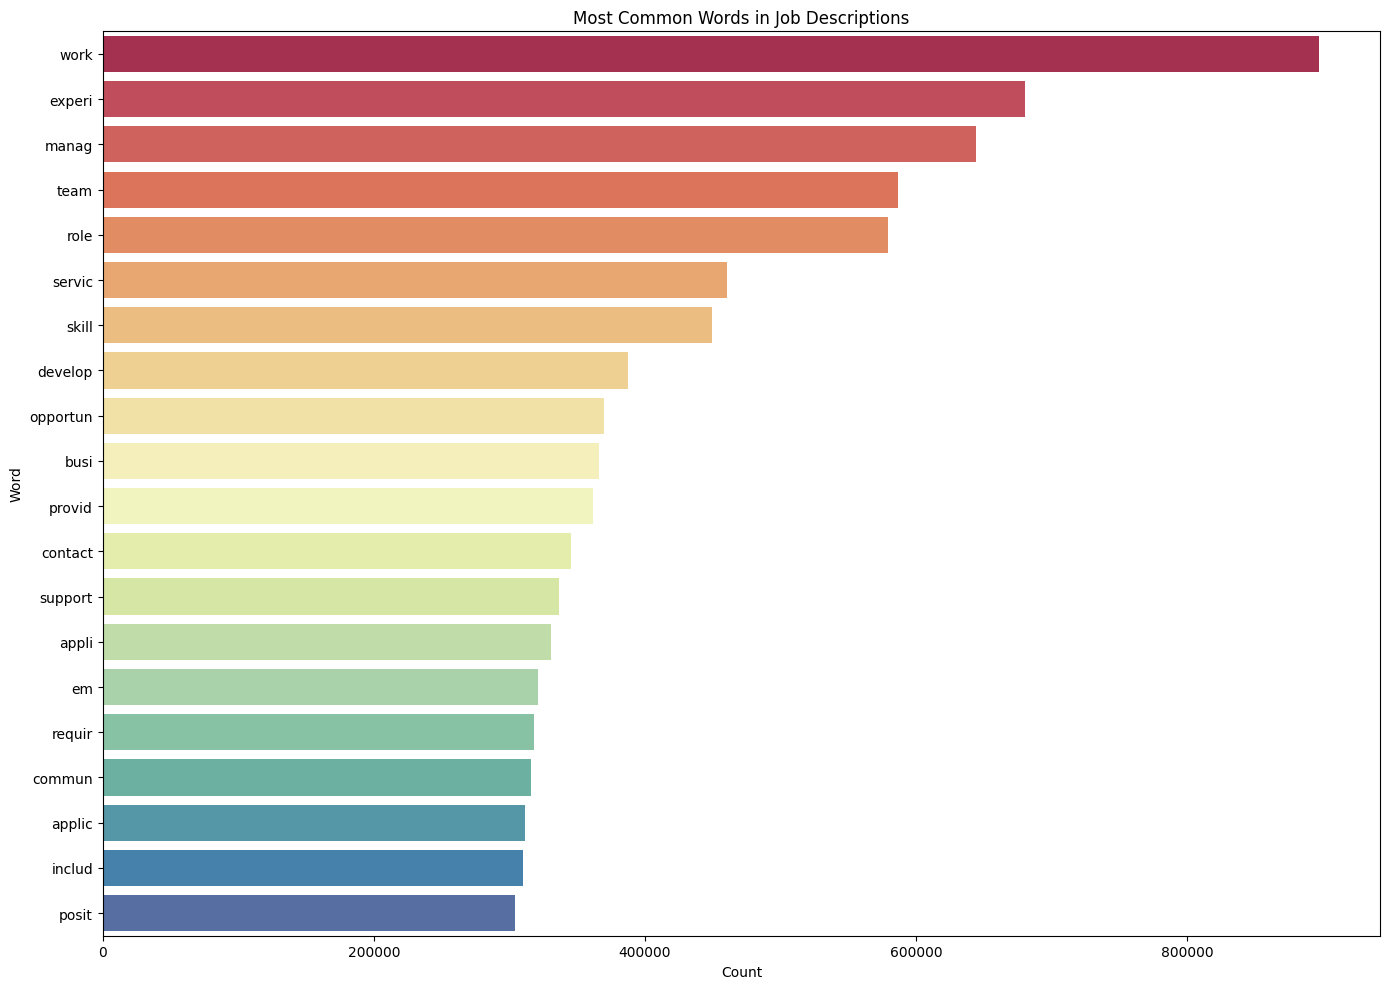

In [19]:
print(word_counts.head(20))
plt.figure(figsize=(14, 10))
sns.barplot(data=word_counts.head(20), x='Count', y='Word', palette='Spectral')
plt.title('Most Common Words in Job Descriptions')
plt.xlabel('Count')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

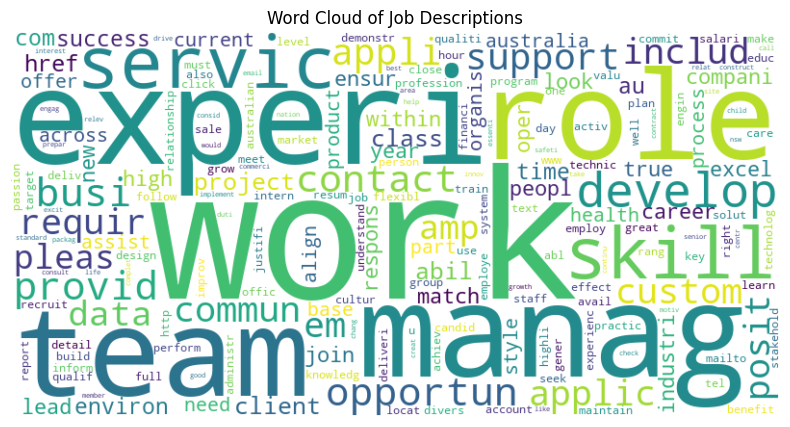

In [20]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts.values))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions')
plt.show()

### Observations:
- Whilst these figures are an interesting way to visualise the dataset, the useage derived from them is limited due to the way the processing was completed.
- Since a lot of these adjectives can be used in different contexts, it makes the individual words essentially meaningless. - For example:
    - Work being the number 1 work could mean any of the following:
        - Working in a team environment
        - Working individually
        - Work experience
        - etc
    - Develop at 8 could mean the following:
        - Develop relationships with clients
        - Develop web programs
        - Develop your skills as a .....
        - etc
- A more useful analysis would be on key phrases rather than individual words.